In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data1 = pd.read_csv('/content/matches.csv')
data2 = pd.read_csv('/content/deliveries.csv')

In [ ]:
data1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
data2.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [ ]:
data1.shape

(756, 18)

In [ ]:
data2.shape

(179078, 21)

In [ ]:
data1.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [ ]:
len(data1)

756

In [ ]:
data1.isnull().sum() / len(data1) * 100

id                  0.000000
season              0.000000
city                0.925926
date                0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
result              0.000000
dl_applied          0.000000
winner              0.529101
win_by_runs         0.000000
win_by_wickets      0.000000
player_of_match     0.529101
venue               0.000000
umpire1             0.264550
umpire2             0.264550
umpire3            84.259259
dtype: float64

In [ ]:
def RNullVal(data):
  drop_colums = [col for col in data.columns if data[col].isnull().sum()/len(data) *100 > 75.0]
  data = data.drop(columns=drop_colums)
  return data

In [ ]:
data1 = RNullVal(data1)

In [ ]:
data1[data1['city'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


In [ ]:
data1[data1['winner'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


In [ ]:
data1[data1['umpire1'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


In [ ]:
data1.dropna(inplace=True)

In [ ]:
data1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong


In [ ]:
data1.shape

(743, 17)

In [ ]:
duplicated_data = data1.duplicated()
duplicated_data.shape

(743,)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               743 non-null    int64 
 1   season           743 non-null    int64 
 2   city             743 non-null    object
 3   date             743 non-null    object
 4   team1            743 non-null    object
 5   team2            743 non-null    object
 6   toss_winner      743 non-null    object
 7   toss_decision    743 non-null    object
 8   result           743 non-null    object
 9   dl_applied       743 non-null    int64 
 10  winner           743 non-null    object
 11  win_by_runs      743 non-null    int64 
 12  win_by_wickets   743 non-null    int64 
 13  player_of_match  743 non-null    object
 14  venue            743 non-null    object
 15  umpire1          743 non-null    object
 16  umpire2          743 non-null    object
dtypes: int64(5), object(12)
memory usag

In [ ]:
data1['date'] = pd.to_datetime(data1['date'])

In [ ]:
data1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,2019,Mohali,2019-05-05,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin
751,11347,2019,Mumbai,2019-05-05,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,2019-07-05,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
754,11414,2019,Visakhapatnam,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [ ]:
for col in data1.columns :
  length = len(data1[col].unique())
  print(f"{col} : {length} \n")
  if length < 50:
    print(data1[col].unique())

id : 743 

season : 12 

[2017 2008 2009 2010 2011 2012 2013 2014 2015 2016 2018 2019]
city : 32 

['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Mumbai' 'Kolkata' 'Bangalore'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Mohali'
 'Bengaluru']
date : 538 

team1 : 15 

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Kolkata Knight Riders'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']
team2 : 15 

['Royal Challengers Bangalore' 'Rising Pune Supergiant'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Sunrisers Hyderabad'
 'Mumbai Indians' 'Gujarat Lions' 'Delhi Daredevils' 'Rajasthan

In [ ]:
lst = [x for x in data1['date']]
lst[:80]

[Timestamp('2017-04-05 00:00:00'),
 Timestamp('2017-04-06 00:00:00'),
 Timestamp('2017-04-07 00:00:00'),
 Timestamp('2017-04-08 00:00:00'),
 Timestamp('2017-04-09 00:00:00'),
 Timestamp('2017-04-09 00:00:00'),
 Timestamp('2017-04-10 00:00:00'),
 Timestamp('2017-04-11 00:00:00'),
 Timestamp('2017-04-12 00:00:00'),
 Timestamp('2017-04-13 00:00:00'),
 Timestamp('2017-04-14 00:00:00'),
 Timestamp('2017-04-14 00:00:00'),
 Timestamp('2017-04-15 00:00:00'),
 Timestamp('2017-04-15 00:00:00'),
 Timestamp('2017-04-16 00:00:00'),
 Timestamp('2017-04-16 00:00:00'),
 Timestamp('2017-04-17 00:00:00'),
 Timestamp('2017-04-17 00:00:00'),
 Timestamp('2017-04-18 00:00:00'),
 Timestamp('2017-04-19 00:00:00'),
 Timestamp('2017-04-20 00:00:00'),
 Timestamp('2017-04-21 00:00:00'),
 Timestamp('2017-04-22 00:00:00'),
 Timestamp('2017-04-22 00:00:00'),
 Timestamp('2017-04-23 00:00:00'),
 Timestamp('2017-04-23 00:00:00'),
 Timestamp('2017-04-24 00:00:00'),
 Timestamp('2017-04-26 00:00:00'),
 Timestamp('2017-04-

In [ ]:
data1 = data1.sort_values('date')
data1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
59,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
60,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri
61,62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar
62,63,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper
63,64,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,11315,2019,Mumbai,2019-10-04,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,3,KA Pollard,Wankhede Stadium,Yeshwant Barde,S Ravi
754,11414,2019,Visakhapatnam,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford
720,11316,2019,Jaipur,2019-11-04,Rajasthan Royals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,4,MS Dhoni,Sawai Mansingh Stadium,Bruce Oxenford,Ulhas Gandhe
721,11317,2019,Kolkata,2019-12-04,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,7,S Dhawan,Eden Gardens,Yeshwant Barde,O Nandan


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 59 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               743 non-null    int64         
 1   season           743 non-null    int64         
 2   city             743 non-null    object        
 3   date             743 non-null    datetime64[ns]
 4   team1            743 non-null    object        
 5   team2            743 non-null    object        
 6   toss_winner      743 non-null    object        
 7   toss_decision    743 non-null    object        
 8   result           743 non-null    object        
 9   dl_applied       743 non-null    int64         
 10  winner           743 non-null    object        
 11  win_by_runs      743 non-null    int64         
 12  win_by_wickets   743 non-null    int64         
 13  player_of_match  743 non-null    object        
 14  venue            743 non-null    object  

In [ ]:
data2.isnull().sum()/len(data2) * 100

match_id             0.000000
inning               0.000000
batting_team         0.000000
bowling_team         0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
bowler               0.000000
is_super_over        0.000000
wide_runs            0.000000
bye_runs             0.000000
legbye_runs          0.000000
noball_runs          0.000000
penalty_runs         0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
player_dismissed    95.066954
dismissal_kind      95.066954
fielder             96.399334
dtype: float64

In [ ]:
data2 = RNullVal(data2)

In [ ]:
data2.isnull().sum()

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

In [ ]:
data2.head(15)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,0,0,0,0,0
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,0,0,0,1,1
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,0,0,0,0,0,1,0,1
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,0,0,0,1,0,0,1,1


In [ ]:
data2_duplicated = data2.duplicated()
data2_duplicated.shape

(179078,)

In [ ]:
for col in data2.columns:
  leng = len(data2[col].unique())
  print(f"{col} : {leng}")

match_id : 756
inning : 5
batting_team : 15
bowling_team : 15
over : 20
ball : 9
batsman : 516
non_striker : 511
bowler : 405
is_super_over : 2
wide_runs : 6
bye_runs : 5
legbye_runs : 6
noball_runs : 5
penalty_runs : 2
batsman_runs : 8
extra_runs : 7
total_runs : 10


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   match_id       179078 non-null  int64 
 1   inning         179078 non-null  int64 
 2   batting_team   179078 non-null  object
 3   bowling_team   179078 non-null  object
 4   over           179078 non-null  int64 
 5   ball           179078 non-null  int64 
 6   batsman        179078 non-null  object
 7   non_striker    179078 non-null  object
 8   bowler         179078 non-null  object
 9   is_super_over  179078 non-null  int64 
 10  wide_runs      179078 non-null  int64 
 11  bye_runs       179078 non-null  int64 
 12  legbye_runs    179078 non-null  int64 
 13  noball_runs    179078 non-null  int64 
 14  penalty_runs   179078 non-null  int64 
 15  batsman_runs   179078 non-null  int64 
 16  extra_runs     179078 non-null  int64 
 17  total_runs     179078 non-null  int64 
dtypes: i

In [ ]:
for batting_col in data2['batting_team'].unique() :
  print(f"{batting_col} : {len(data2[data2['batting_team'] == batting_col]) / len(data2) *100} %")

Sunrisers Hyderabad : 7.208032254101565 %
Royal Challengers Bangalore : 11.675359340622522 %
Mumbai Indians : 12.630808921252193 %
Rising Pune Supergiant : 1.0609901830487274 %
Gujarat Lions : 1.9913110488167167 %
Kolkata Knight Riders : 11.647438546331767 %
Kings XI Punjab : 11.68820290599627 %
Delhi Daredevils : 10.49040083092284 %
Chennai Super Kings : 11.035414735478396 %
Rajasthan Royals : 9.65612749751505 %
Deccan Chargers : 5.044729112453791 %
Kochi Tuskers Kerala : 0.8834139313595193 %
Pune Warriors : 3.0394576664916966 %
Rising Pune Supergiants : 0.882297099587889 %
Delhi Capitals : 1.0660159260210635 %


# EDA

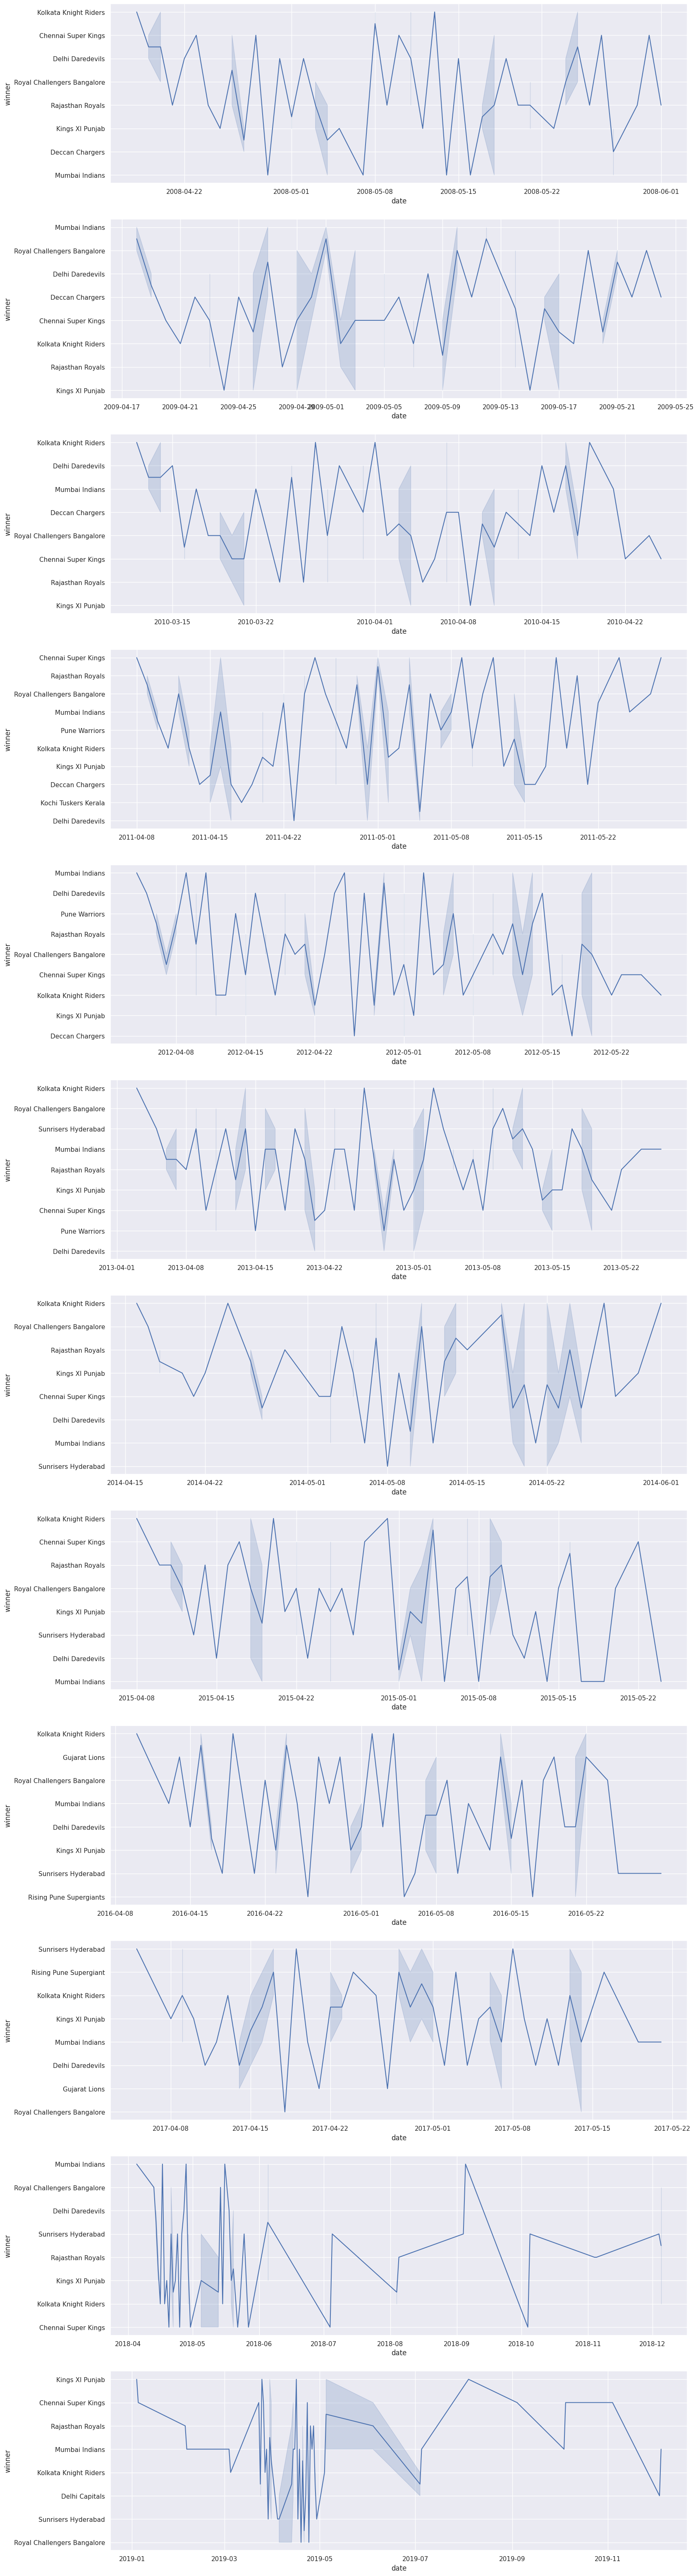

In [ ]:
fig , ax = plt.subplots(12,1,figsize=(18,80))
sns.lineplot(data1[0:58],x='date',y='winner',ax=ax[0])
sns.lineplot(data1[58:115],x='date',y='winner',ax=ax[1])
sns.lineplot(data1[115:175],x='date',y='winner',ax=ax[2])
sns.lineplot(data1[175:247],x='date',y='winner',ax=ax[3])
sns.lineplot(data1[247:321],x='date',y='winner',ax=ax[4])
sns.lineplot(data1[321:397],x='date',y='winner',ax=ax[5])
sns.lineplot(data1[397:450],x='date',y='winner',ax=ax[6])
sns.lineplot(data1[450:507],x='date',y='winner',ax=ax[7])
sns.lineplot(data1[508:567],x='date',y='winner',ax=ax[8])
sns.lineplot(data1[567:625],x='date',y='winner',ax=ax[9])
sns.lineplot(data1[628:685],x='date',y='winner',ax=ax[10])
sns.lineplot(data1[685:743],x='date',y='winner',ax=ax[11])
sns.set_theme(style='darkgrid')
plt.show()

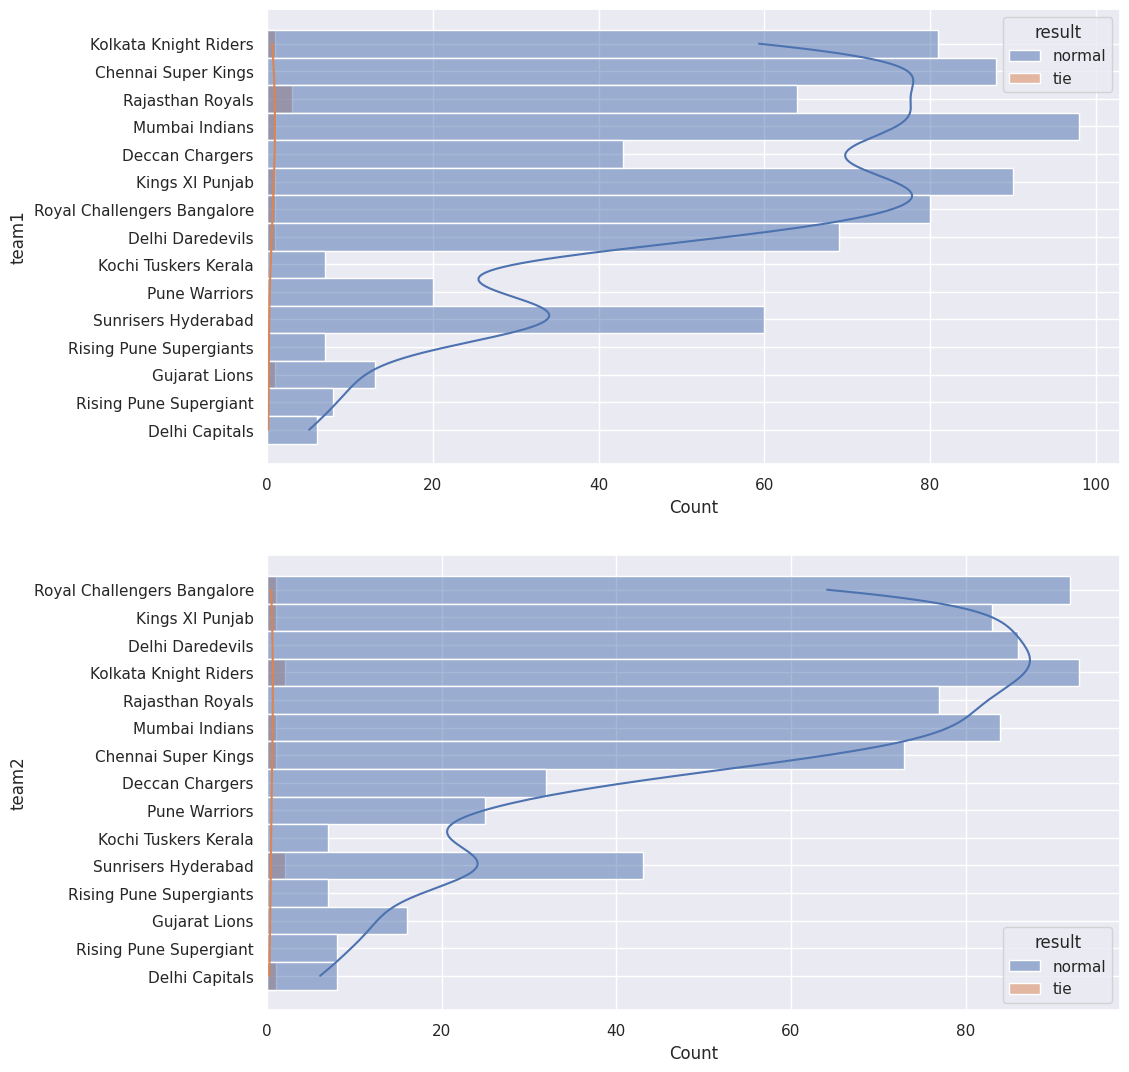

In [ ]:
fig , axis = plt.subplots(2,1,figsize=(11,13))
sns.histplot(data1,y='team1',hue='result',kde=True,ax=axis[0])
sns.histplot(data1,y='team2',hue='result',kde=True,ax=axis[1])
plt.show()

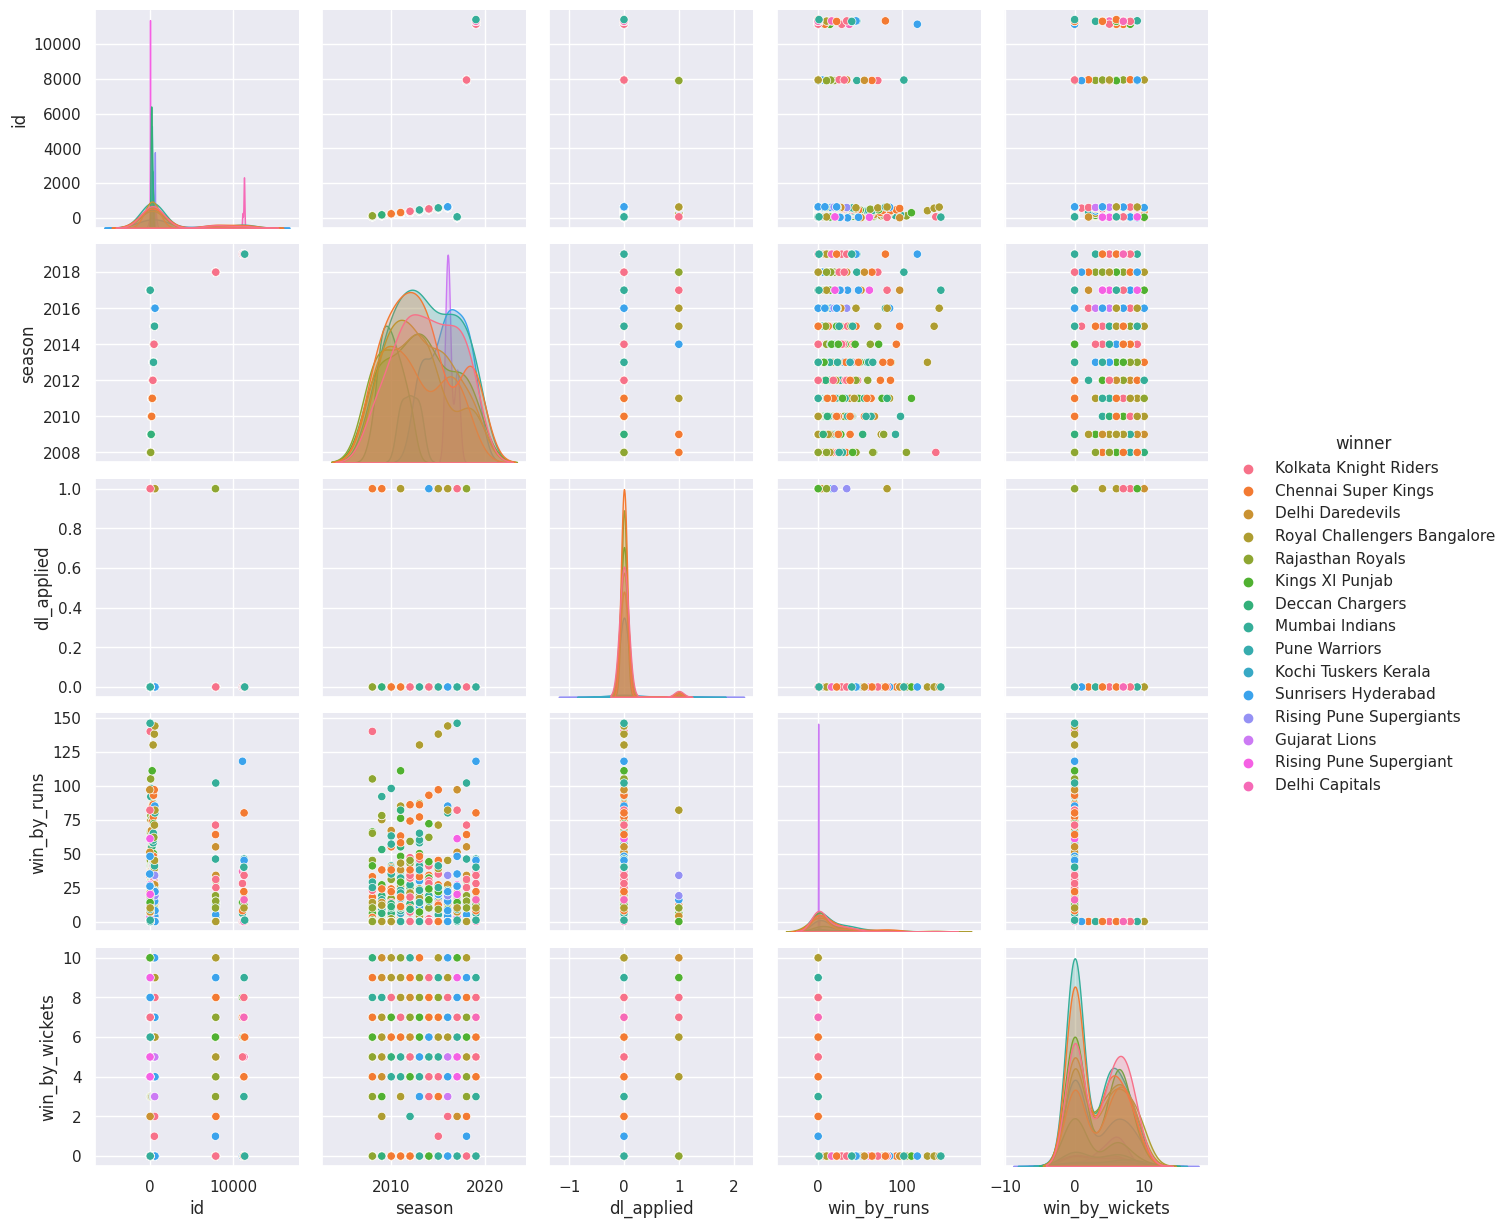

In [ ]:
sns.pairplot(data1,hue='winner')
plt.show()

<Axes: xlabel='dl_applied', ylabel='count'>

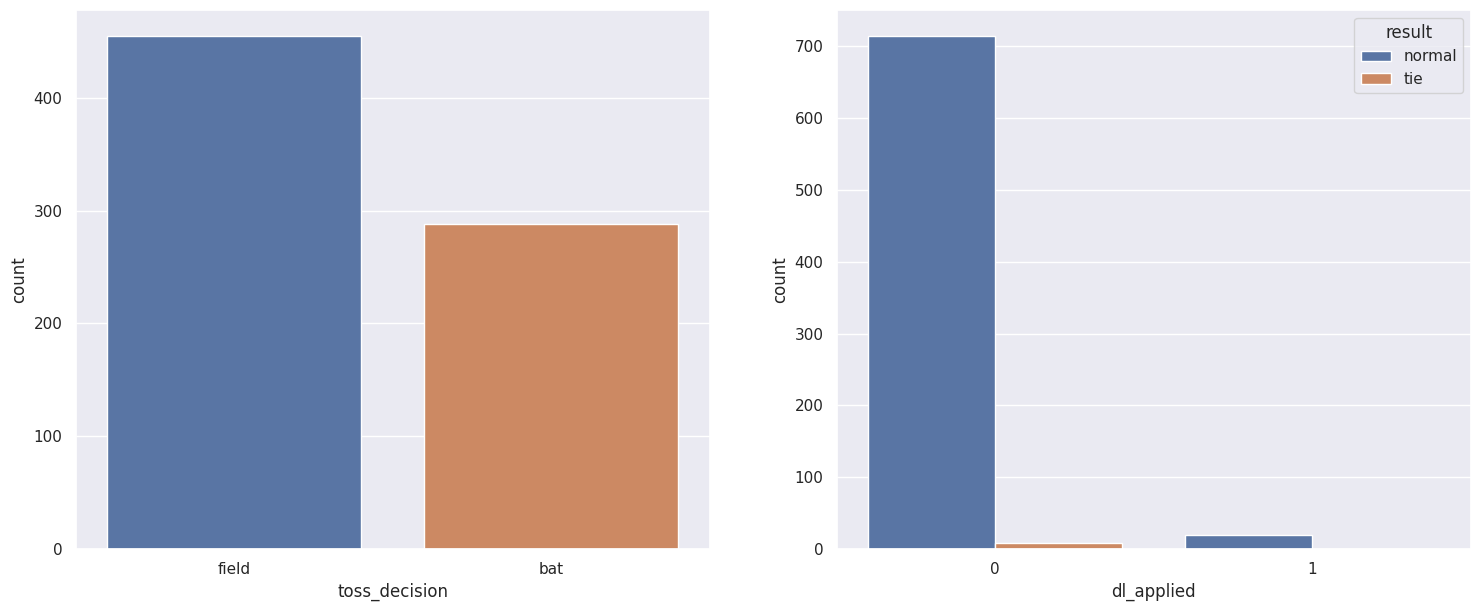

In [ ]:
fig , ax = plt.subplots(1,2,figsize=(18,7))
sns.countplot(data1,x='toss_decision',ax=ax[0])
sns.countplot(data1,x='dl_applied',hue='result',ax=ax[1])

<ipython-input-38-d3802d66b4cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data1.corr()


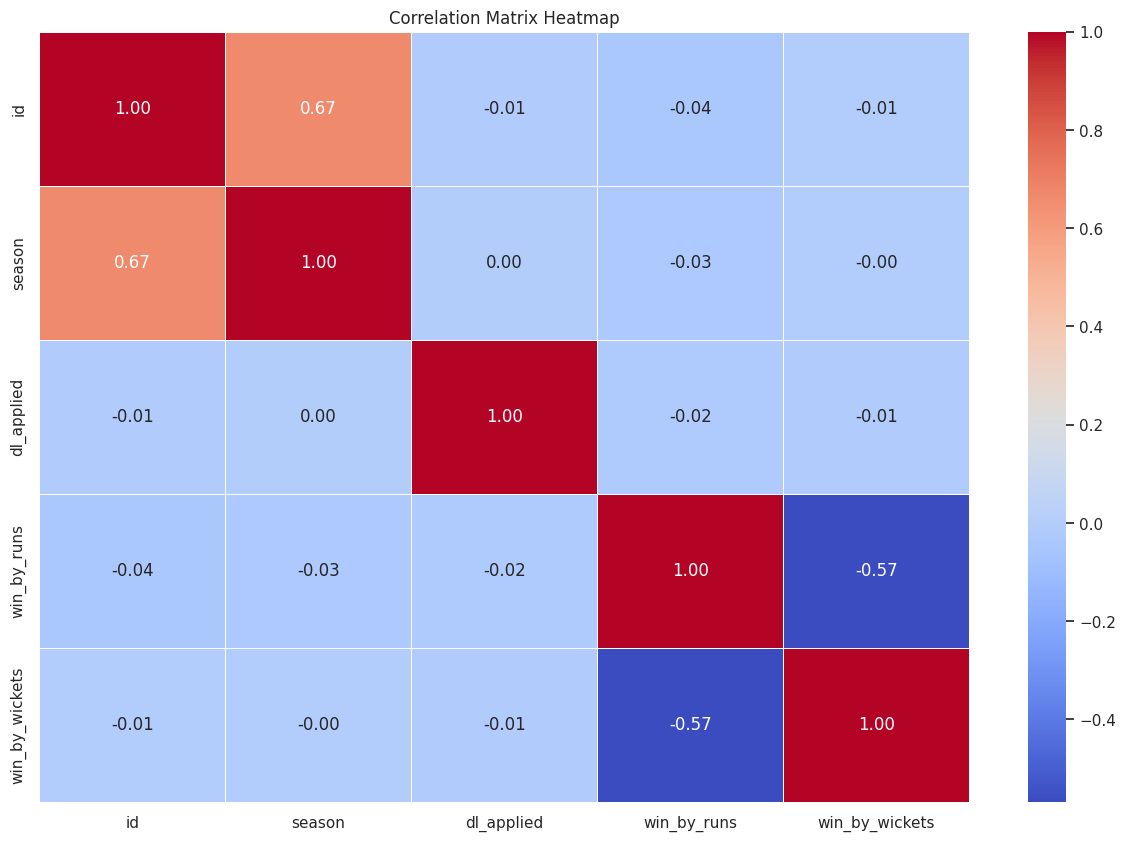

In [ ]:
correlation_matrix = data1.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

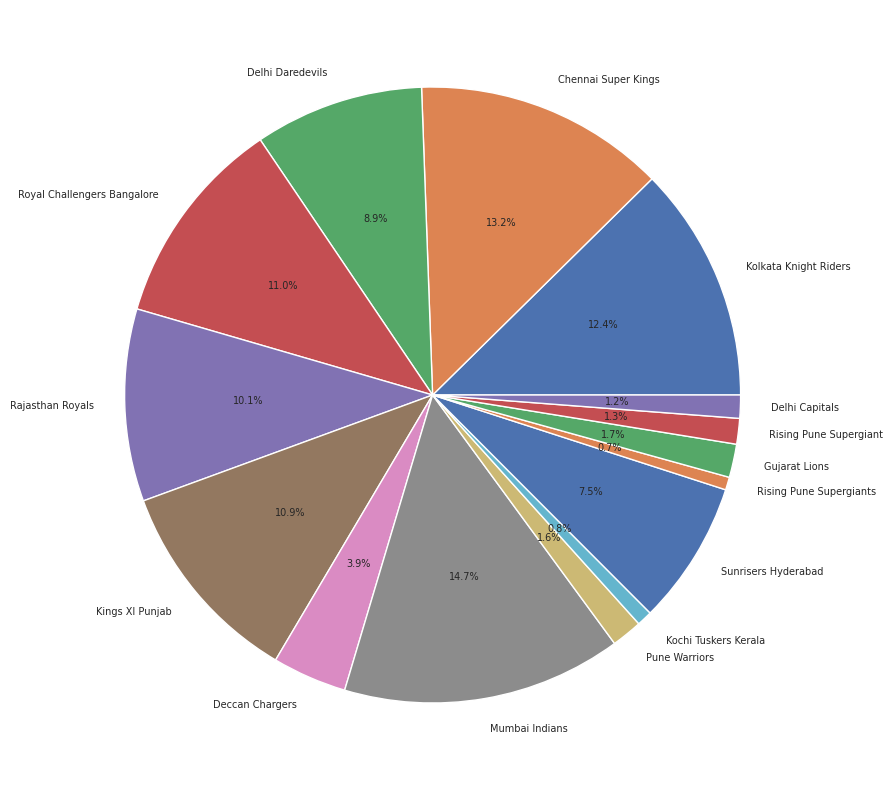

In [ ]:
wighet_list = [len(data1[data1['winner']==col])/len(data1)*100 for col in data1['winner'].unique()]
fig , ax = plt.subplots(1,figsize=(14,10))
plt.pie(wighet_list,labels=data1['winner'].unique(),autopct="%1.1f%%",textprops={'fontsize': 7})
plt.show()

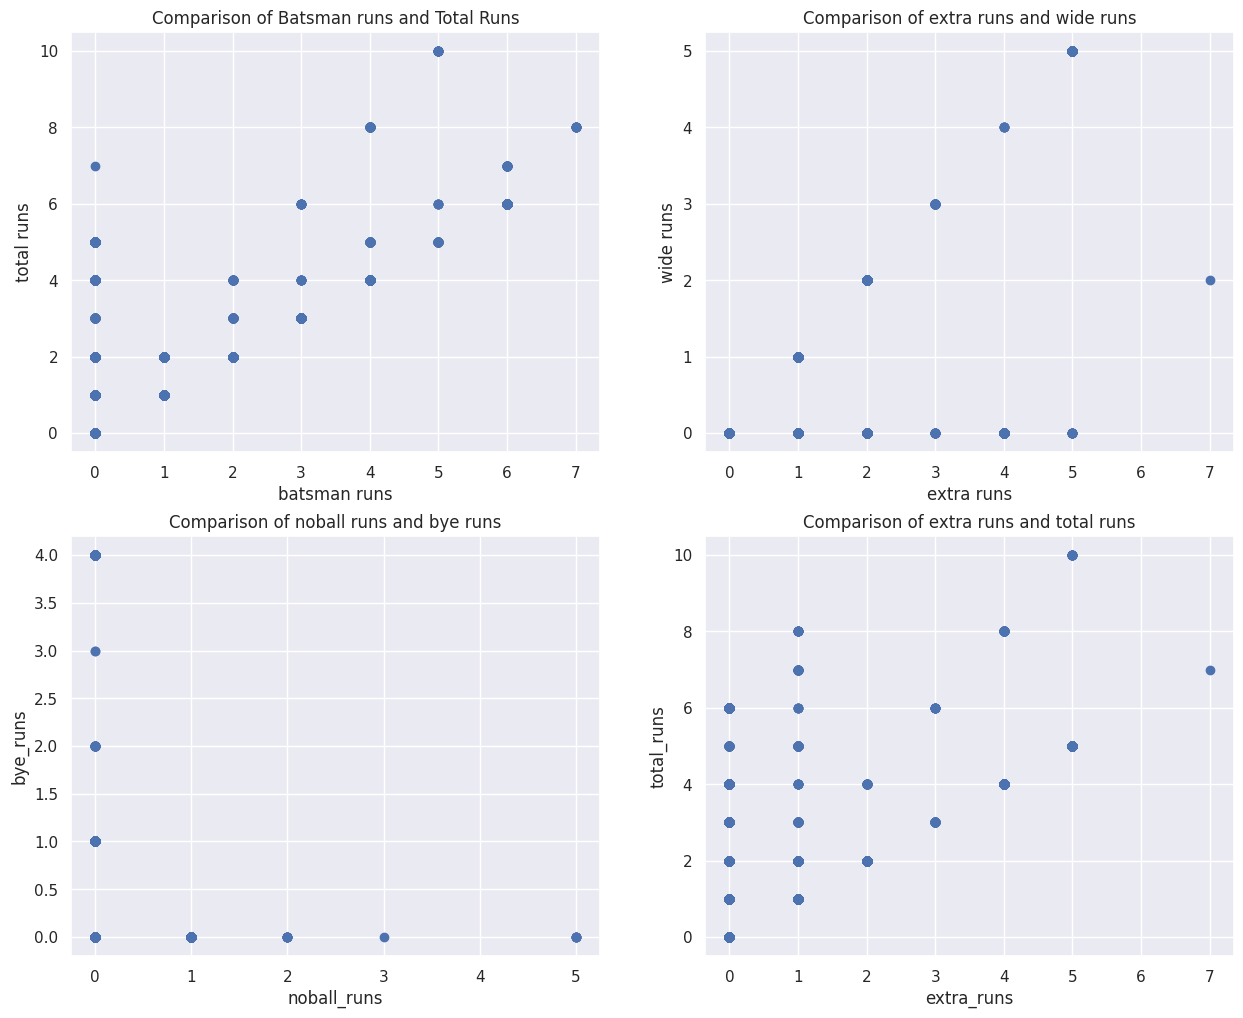

In [ ]:
fig , ax = plt.subplots(2,2,figsize=(15,12))
ax[0,0].scatter(data2['batsman_runs'],data2['total_runs'])
ax[0,0].set_xlabel("batsman runs")
ax[0,0].set_ylabel("total runs")
ax[0,0].set_title("Comparison of Batsman runs and Total Runs")


ax[0,1].scatter(data2['extra_runs'],data2['wide_runs'])
ax[0,1].set_xlabel("extra runs")
ax[0,1].set_ylabel("wide runs")
ax[0,1].set_title("Comparison of extra runs and wide runs")


ax[1,0].scatter(data2['noball_runs'],data2['bye_runs'])
ax[1,0].set_xlabel("noball_runs")
ax[1,0].set_ylabel("bye_runs")
ax[1,0].set_title("Comparison of noball runs and bye runs")

ax[1,1].scatter(data2['extra_runs'],data2['total_runs'])
ax[1,1].set_xlabel("extra_runs")
ax[1,1].set_ylabel("total_runs")
ax[1,1].set_title("Comparison of extra runs and total runs")
plt.show()

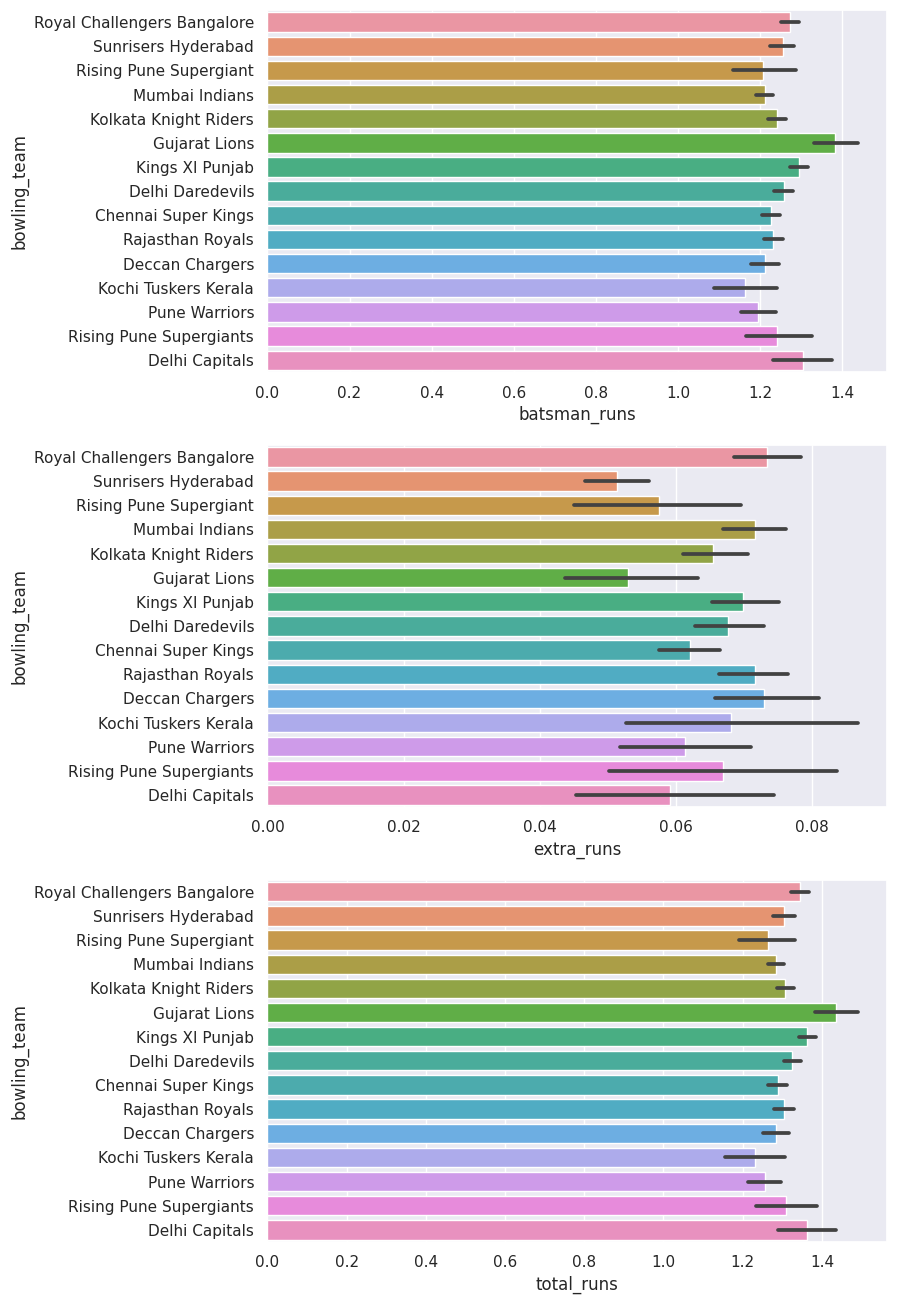

In [82]:
fig , ax = plt.subplots(3,1,figsize=(8,16))
x = 0
for col in data2.columns[-3:]:
  sns.barplot(data2,x=col,y='bowling_team',ax=ax[x])
  x = x + 1